In [1]:
import os
from PIL import Image as im
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_labels = pd.read_csv('Machine Learning Task/train_labels.csv')
test_labels = pd.read_csv('Machine Learning Task/test_labels.csv')

In [3]:
train_labels.head()

,id,label
0,10,cat
1,18,cat
2,22,cat
3,27,cat
4,34,cat


In [4]:
train_labels.shape

(8000, 2)

In [5]:
test_labels.head()

,id,label
0,40217,cat
1,40227,cat
2,40228,cat
3,40233,cat
4,40247,cat


In [6]:
test_labels.shape

(2000, 2)

In [7]:
mapping = {'cat' : 0, 'dog' : 1}
train_labels['label'] = train_labels['label'] == 'dog'
test_labels['label'] = test_labels['label'] == 'dog'

In [8]:
train_labels.head()

,id,label
0,10,False
1,18,False
2,22,False
3,27,False
4,34,False


In [9]:
train = train_labels.to_numpy(dtype='int32')
test = test_labels.to_numpy(dtype='int32')
print(train)

[[   10     0]
 [   18     0]
 [   22     0]
 ...
 [40311     1]
 [40332     1]
 [40352     1]]


In [10]:
#shuffle array
np.random.shuffle(train)
print(train)

[[ 6608     0]
 [35113     1]
 [34491     0]
 ...
 [ 1077     0]
 [24191     1]
 [ 1272     0]]


In [11]:
x_train,y_train = train.T
x_test,y_test = test.T

In [12]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [13]:
x_trainImgs = []
x_testImgs = []
for img_name in x_train:
    name = str(img_name)+'.png'
    x_trainImgs.append(np.array(im.open(os.path.join('Machine Learning Task','train_data',name))))

for img_name in x_test:
    name = str(img_name)+'.png'
    x_testImgs.append(np.array(im.open(os.path.join('Machine Learning Task','test_data',name))))
    
x_trainImgs = np.array(x_trainImgs)
x_testImgs = np.array(x_testImgs)

In [14]:
x_trainImgs = x_trainImgs /255.0
x_testImgs = x_testImgs / 255.0

In [15]:
print('train',x_trainImgs.shape)
print('test',x_testImgs.shape)

train (8000, 32, 32, 3)
test (2000, 32, 32, 3)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
import os

Using TensorFlow backend.


In [17]:
x_trainGray = x_trainImgs.mean(axis=-1).reshape(-1,32,32,1)
x_testGray = x_testImgs.mean(axis=-1).reshape(-1,32,32,1)
print('Gray train',x_trainGray.shape)
print('Gray test',x_testGray.shape)

Gray train (8000, 32, 32, 1)
Gray test (2000, 32, 32, 1)


In [18]:
dropout = 0.2
batch_size = 128

In [19]:
model = Sequential()
model.add(Dense(128, input_dim=32*32))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2064      
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

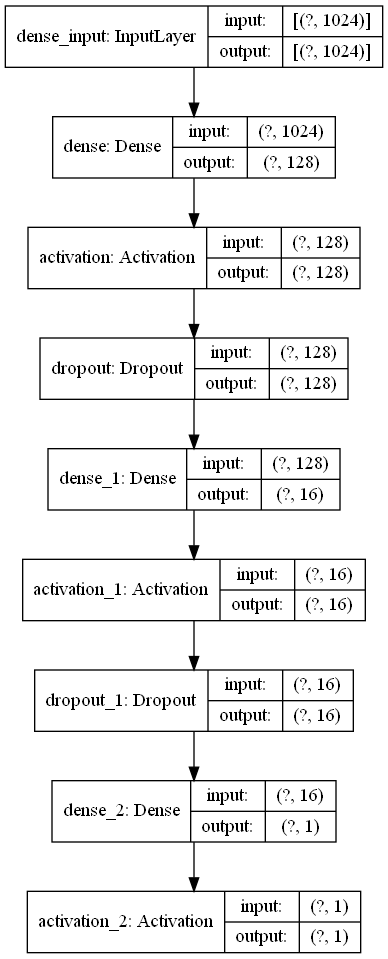

In [21]:
plot_model(model, to_file='ann-cat-dog.png', show_shapes=True)

In [22]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
x_traininp = x_trainGray.reshape(8000,-1) 
print(x_traininp.shape)
model.fit(x=x_traininp,y= y_train, epochs=100, batch_size=batch_size,validation_split=0.2)

(8000, 1024)
Epoch 1/100
50/50 [==============================] - 0s 8ms/step - loss: 0.6918 - accuracy: 0.5267 - val_loss: 0.6879 - val_accuracy: 0.5437
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6820 - accuracy: 0.5508 - val_loss: 0.6818 - val_accuracy: 0.5631
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.5616 - val_loss: 0.6733 - val_accuracy: 0.5719
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6747 - accuracy: 0.5709 - val_loss: 0.6695 - val_accuracy: 0.5756
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.5627 - val_loss: 0.6681 - val_accuracy: 0.5756
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.5738 - val_loss: 0.6698 - val_accuracy: 0.5825
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.5877 - val_loss: 0.6637 - val_accuracy: 0.5863


50/50 [==============================] - 0s 4ms/step - loss: 0.6099 - accuracy: 0.6442 - val_loss: 0.6584 - val_accuracy: 0.5944
Epoch 59/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6107 - accuracy: 0.6444 - val_loss: 0.6565 - val_accuracy: 0.5994
Epoch 60/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6088 - accuracy: 0.6422 - val_loss: 0.6600 - val_accuracy: 0.5962
Epoch 61/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6115 - accuracy: 0.6420 - val_loss: 0.6603 - val_accuracy: 0.6019
Epoch 62/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6086 - accuracy: 0.6422 - val_loss: 0.6615 - val_accuracy: 0.5944
Epoch 63/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6085 - accuracy: 0.6381 - val_loss: 0.6635 - val_accuracy: 0.6069
Epoch 64/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6016 - accuracy: 0.6491 - val_loss: 0.6635 - val_accuracy: 0.5975
Epoch 65/100
50/50 

In [24]:
x_testinp = x_testGray.reshape(2000,-1)
loss, acc = model.evaluate(x_testinp, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

16/16 [==============================] - 0s 2ms/step - loss: 0.7253 - accuracy: 0.5880

Test accuracy: 58.8%


In [25]:
## CNN

In [26]:
from keras.layers import Flatten, Conv2D, MaxPool2D
from sklearn.metrics import confusion_matrix

In [27]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation = "sigmoid"))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)         

In [28]:
model.compile(optimizer = 'adam' , loss = "binary_crossentropy", metrics=["accuracy"])

In [29]:
model.fit(x_trainImgs,y_train,epochs=25, batch_size=batch_size,validation_split=0.2)

Epoch 1/25
50/50 [==============================] - 42s 830ms/step - loss: 0.6863 - accuracy: 0.5473 - val_loss: 0.6799 - val_accuracy: 0.5675
Epoch 2/25
50/50 [==============================] - 41s 813ms/step - loss: 0.6524 - accuracy: 0.6159 - val_loss: 0.6305 - val_accuracy: 0.6425
Epoch 3/25
50/50 [==============================] - 41s 814ms/step - loss: 0.6224 - accuracy: 0.6514 - val_loss: 0.6014 - val_accuracy: 0.6706
Epoch 4/25
50/50 [==============================] - 41s 828ms/step - loss: 0.6049 - accuracy: 0.6652 - val_loss: 0.5929 - val_accuracy: 0.6725
Epoch 5/25
50/50 [==============================] - 40s 803ms/step - loss: 0.5724 - accuracy: 0.6959 - val_loss: 0.5694 - val_accuracy: 0.6988
Epoch 6/25
50/50 [==============================] - 39s 772ms/step - loss: 0.5509 - accuracy: 0.7122 - val_loss: 0.5555 - val_accuracy: 0.7100
Epoch 7/25
50/50 [==============================] - 41s 824ms/step - loss: 0.5332 - accuracy: 0.7292 - val_loss: 0.5392 - val_accuracy: 0.7319

In [30]:
loss, acc = model.evaluate(x_testImgs, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

16/16 [==============================] - 2s 136ms/step - loss: 0.7461 - accuracy: 0.7705

Test accuracy: 77.1%


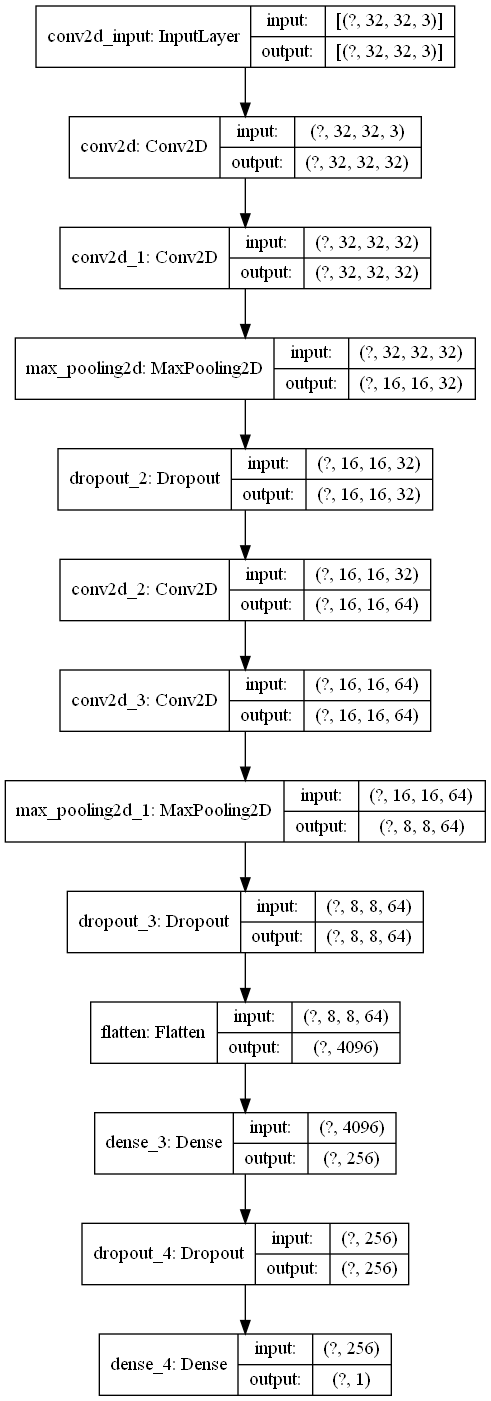

In [31]:
plot_model(model, to_file='cnn-cat-dog.png', show_shapes=True)

In [40]:
predicted = model.predict(x_testImgs).round().flatten() 

In [41]:
total = len(predicted)

In [46]:
correct = np.sum(predicted == y_test)

In [47]:
accuracy = correct / total
print(accuracy)

0.7705
